# TIME SERIES MODELS

<hr style="height:2px; border-width:0; color:gray; background-color:gray">

<table width="100%">
  <tr>
    <td align="left" width="60%">
      <h2 style="color: #2c3e50; font-family: Arial, sans-serif;">
        Technology for Financial Forecasting
      </h2>
      <p>
        <strong>Chandravesh Chaudhari</strong><br>
        Assistant Professor<br>
        School of Business and Management<br>
        <a href="mailto:chandravesh.chaudhari@christuniversity.in" style="color: #2980b9; text-decoration: none;">
          chandravesh.chaudhari@christuniversity.in
        </a>
      </p>
    </td>
    <td align="right" width="40%">
      <img src="logo.jpg" alt="Christ University" width="250">
    </td>
  </tr>
</table>

<hr style="height:2px; border-width:0; color:gray; background-color:gray">






**Duration**: 9 Hours

1. Components of Time Series Data
2. Average Forecasting Method
3. Errors and Error Criterion
4. Naïve Forecasting Method
5. Moving Average Forecast
6. Simple Exponential Smoothing (SES) Forecast
7. Diagnostic Tools to Evaluate Forecasting Models and Their Results



---
## Topic: Components of Time Series Data

---

## 1. What are the Components of Time Series?

Time series data typically has four main components:

- **Trend (T)**: The long-term movement or direction in the data (e.g., upward or downward).
- **Seasonality (S)**: The repeating short-term patterns or fluctuations that occur at regular intervals (e.g., monthly, yearly).
- **Cyclic (C)**: The long-term fluctuations that do not occur at regular intervals (e.g., business cycles).
- **Irregular (I)**: The random or irregular component, often caused by unforeseen events or noise in the data.


### Use in Finance:
- **Trend**: Stock market growth over the long term.
- **Seasonality**: Quarterly sales fluctuations of a company due to consumer behavior.
- **Cyclic**: Business cycle impacts on GDP growth or recessions.
- **Irregular**: Unpredictable shocks like the COVID-19 pandemic impacting financial markets.


## 2. Decomposition of Time Series Data

We can decompose a time series into these components using statistical methods such as **Classical Decomposition** or **STL (Seasonal-Trend decomposition using LOESS)**.

### Decomposition formula:
$$
Y_t = T_t + S_t + C_t + I_t
$$
Where:
- $ Y_t $ is the observed value at time $ t $,
- $ T_t $ is the trend component,
- $ S_t $ is the seasonal component,
- $ C_t $ is the cyclic component,
- $ I_t $ is the irregular component.


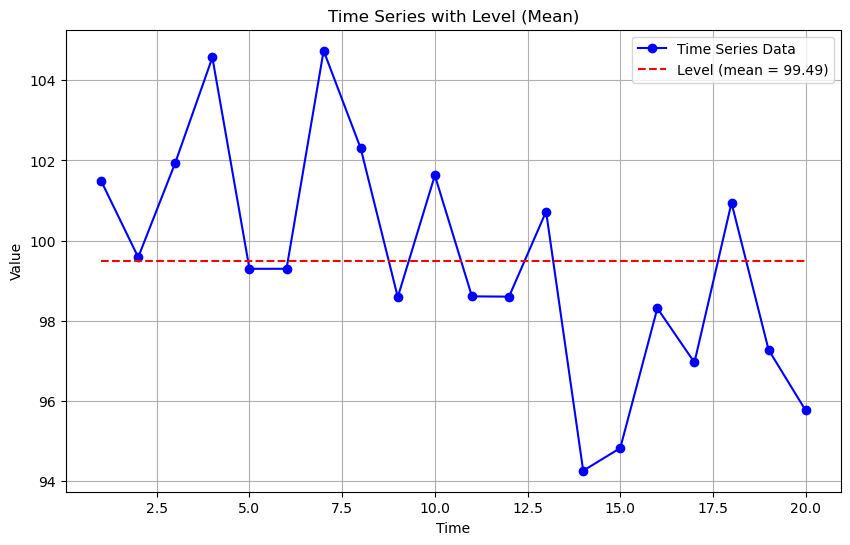

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample time series data (e.g., sales with some noise)
np.random.seed(42)
time = np.arange(1, 21)  # 20 time periods
values = 100 + np.random.normal(0, 3, size=len(time))  # Level around 100 + noise

# Calculate the level as the mean of the series
level = np.mean(values)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time, values, marker='o', linestyle='-', color='blue', label='Time Series Data')

# Plot the level
plt.hlines(level, xmin=time[0], xmax=time[-1], colors='red', linestyles='--', label=f'Level (mean = {level:.2f})')

# Add title and labels
plt.title('Time Series with Level (Mean)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


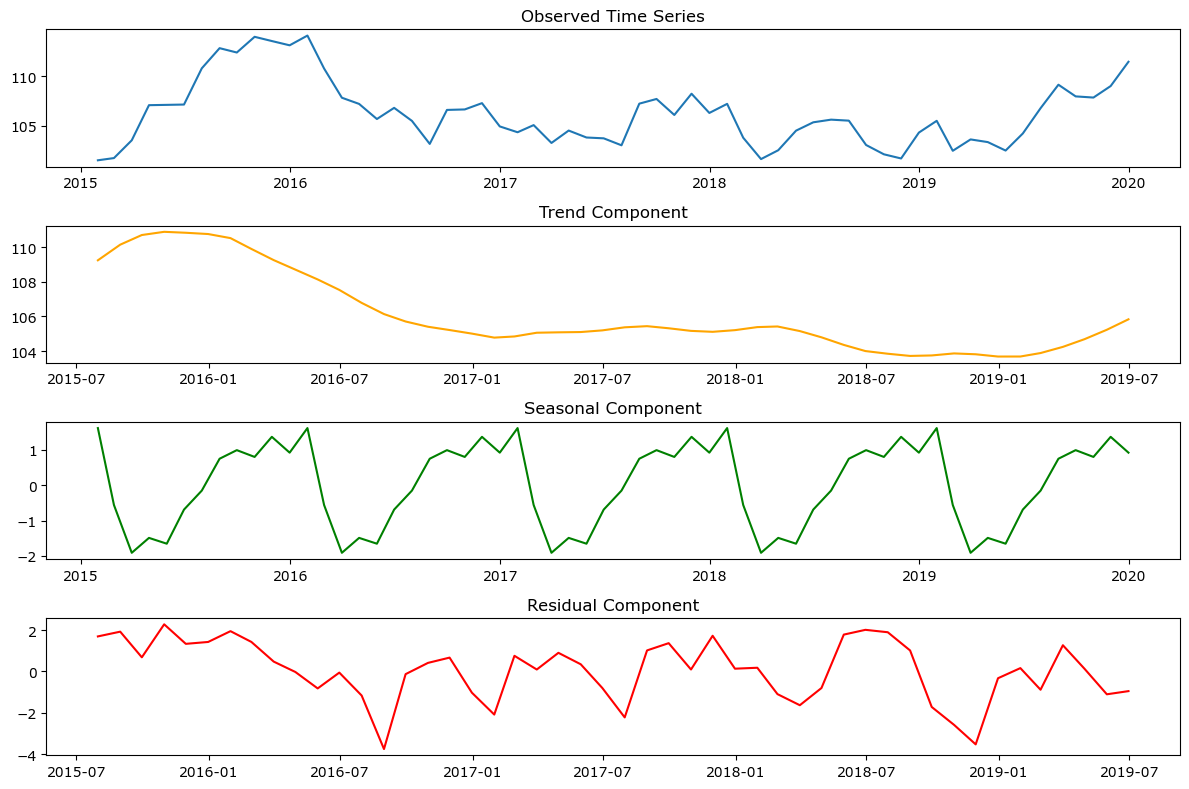

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate monthly stock data over 5 years (60 months)
np.random.seed(42)
months = pd.date_range(start='2015-01-01', periods=60, freq='M')
stock_prices = 100 + np.cumsum(np.random.normal(loc=0.5, scale=2, size=60))  # Random walk for prices
df = pd.DataFrame({'Stock Price': stock_prices}, index=months)

# Decompose the time series using seasonal decomposition of time series (STL)
decomposition = sm.tsa.seasonal_decompose(df['Stock Price'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Stock Price'], label='Observed')
plt.title('Observed Time Series')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

4. Interpretation of Results
	•	Trend: Identifies the long-term movement in stock prices.
	•	Seasonal: Shows repeating patterns in stock prices (e.g., yearly fluctuations).
	•	Residuals: The leftover noise, which can indicate anomalies or irregular events.
	•	Cyclic: Although not directly decomposed, business cycle effects can be inferred from the residuals.



## 1. The Model

We assume an **additive** form:

$$
Y_t \;=\; T_t \;+\; S_t \;+\; R_t
$$

where

* $T_t$ = trend component
* $S_t$ = seasonal component (length $m$)
* $R_t$ = residual (irregular)


## 2. Estimate the Trend $\mathbf{T_t}$ via Centered Moving Average

Let $m$ = seasonality period (e.g.\ $m=12$ for monthly data, $m=4$ for quarterly).

1. Compute the $m$‑point moving average (MA$_m$):

   $$
   \overline{Y}_{t} 
   = \frac{1}{m}\sum_{i=-(m-1)/2}^{+(m-1)/2} Y_{t+i}
   \quad
   \text{(if $m$ odd).}
   $$

   If $m$ is even, you do two successive averages to “center” it:

   $$
   \text{MA}_m(t)
   \;\to\;
   T_{t} 
   = \frac{\text{MA}_m(t) + \text{MA}_m(t+1)}{2}.
   $$
2. The result $T_t$ is your **trend** estimate, defined only for those $t$ where the average is “fully inside” the data.


## 3. Detrend to Expose Seasonality

Form the **detrended** series:

$$
D_t \;=\; Y_t \;-\; T_t
$$

Each $D_t$ still contains both seasonality $S_t$ and residual $R_t$:

$$
D_t = S_t + R_t.
$$



## 4. Estimate the Seasonal Indices $\mathbf{S_i}$

Because seasonality repeats every $m$ periods, index months/quartiles/etc.\ by $i=1,\dots,m$.

1. For each season $i$, collect all $D_t$ where $t \equiv i\pmod m$.
2. Average them:

   $$
   \hat S_i 
   = \frac{1}{N_i}\sum_{t \equiv i\;(m)} D_t,
   $$

   where $N_i$ = number of cycles.
3. (Optional) **Normalize** so $\sum_{i=1}^m \hat S_i = 0$ (additive case).

Then extend $\hat S_t = \hat S_{((t-1)\bmod m)+1}$ to all $t$.



## 5. Compute the Residuals $\mathbf{R_t}$

Finally,

$$
R_t \;=\; Y_t \;-\; T_t \;-\; \hat S_t.
$$

These $R_t$ should look like “random noise” if the decomposition is good.


## 6. Worked Illustration (Additive, $m=4$)

| $t$ | $Y_t$ |      4‑pt MA (uncentered)     |         Centered $T_t$        | Detrended $D_t=Y_t-T_t$ | Season $i$ |
| :-: | :---: | :---------------------------: | :---------------------------: | :---------------------: | :--------: |
|  1  |  120  |               —               |               —               |            —            |      1     |
|  2  |  150  |               —               |               —               |            —            |      2     |
|  3  |  100  |  $ (120+150+100+130)/4 =125$  |               —               |            —            |      3     |
|  4  |  130  |  $ (150+100+130+140)/4 =130$  |   $\frac{125+130}{2}=127.5$   |     $130-127.5=2.5$     |      4     |
|  5  |  140  |  $ (100+130+140+170)/4 =135$  |   $\frac{130+135}{2}=132.5$   |     $140-132.5=7.5$     |      1     |
|  6  |  170  | $ (130+140+170+110)/4 =137.5$ | $\tfrac{135+137.5}{2}=136.25$ |    $170-136.25=33.75$   |      2     |
|  7  |  110  |               —               |               —               |            —            |      3     |
|  8  |  135  |               —               |               —               |            —            |      4     |

1. **Trend** $\{T_4,T_5,T_6\}=\{127.5,132.5,136.25\}.$
2. **Detrended** $D_4=2.5,\;D_5=7.5,\;D_6=33.75.$
3. Group these by season $i$:

   * Season 1 ($i=1$): only $D_5=7.5$
   * Season 2: $D_6=33.75$
   * Season 3: (no detrended point here)
   * Season 4: $D_4=2.5$
4. Seasonal indices $\hat S_i$ are just these averages.  (With more years you’d average across cycles.)
5. **Residual** $R_t = Y_t - T_t - \hat S_t$.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate 60 months of stock price data
np.random.seed(42)
months = pd.date_range(start='2015-01-01', periods=60, freq='ME')
Y_t = 100 + np.cumsum(np.random.normal(loc=0.5, scale=2, size=60))  # random walk
df = pd.DataFrame({'Month': months, 'Y_t': Y_t})
df['Month Name'] = df['Month'].dt.month

# Step 2: Trend using 12-month centered moving average
df['T_t'] = df['Y_t'].rolling(window=12, center=True).mean()

# Step 3: Detrended values
df['D_t'] = df['Y_t'] - df['T_t']

# Step 4: Seasonal component (monthly average of detrended)
seasonal_means = df.dropna(subset=['D_t']).groupby('Month Name')['D_t'].mean().rename('S_t')
df = df.merge(seasonal_means, how='left', on='Month Name')

# Step 5: Residuals
df['R_t'] = df['Y_t'] - df['T_t'] - df['S_t']

df


,Month,Y_t,Month Name,T_t,D_t,S_t,R_t
0,2015-01-31,101.49,1,NaN,NaN,1.63,NaN
1,2015-02-28,101.72,2,NaN,NaN,-0.55,NaN
2,2015-03-31,103.51,3,NaN,NaN,-1.91,NaN
3,2015-04-30,107.06,4,NaN,NaN,-1.50,NaN
4,2015-05-31,107.09,5,NaN,NaN,-1.65,NaN
5,2015-06-30,107.12,6,NaN,NaN,-0.65,NaN
6,2015-07-31,110.78,7,108.71,2.07,0.08,1.99
7,2015-08-31,112.82,8,109.76,3.05,0.81,2.24
8,2015-09-30,112.38,9,110.52,1.86,1.05,0.81
9,2015-10-31,113.96,10,110.87,3.09,0.82,2.27


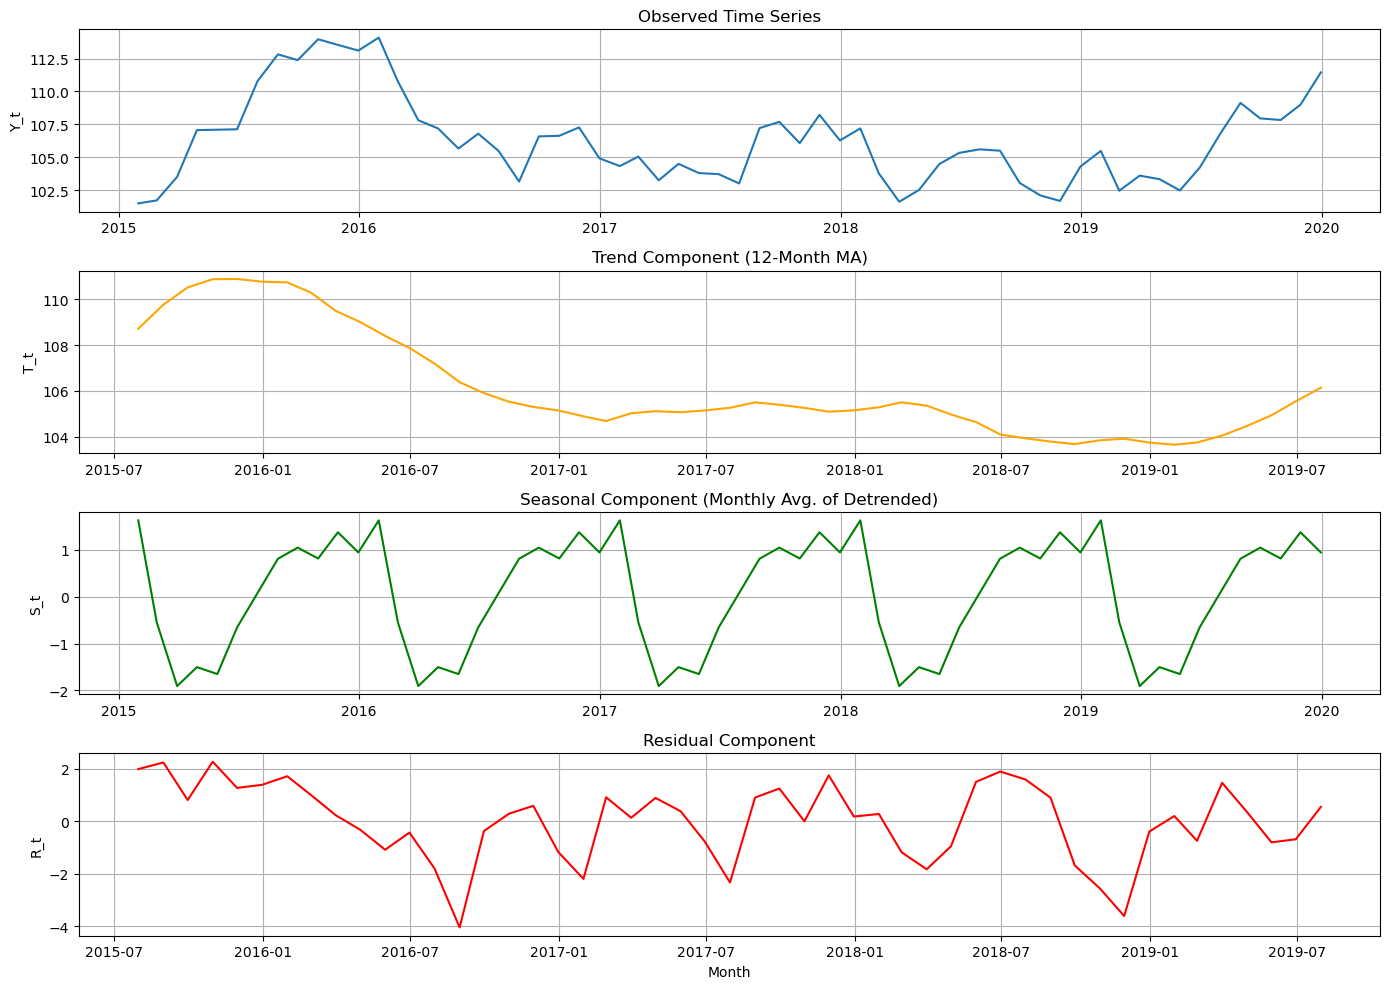

In [7]:

# Plotting
plt.figure(figsize=(14, 10))

# Observed
plt.subplot(411)
plt.plot(df['Month'], df['Y_t'], label='Observed')
plt.title('Observed Time Series')
plt.ylabel('Y_t')
plt.grid(True)

# Trend
plt.subplot(412)
plt.plot(df['Month'], df['T_t'], color='orange', label='Trend')
plt.title('Trend Component (12-Month MA)')
plt.ylabel('T_t')
plt.grid(True)

# Seasonal
plt.subplot(413)
plt.plot(df['Month'], df['S_t'], color='green', label='Seasonal')
plt.title('Seasonal Component (Monthly Avg. of Detrended)')
plt.ylabel('S_t')
plt.grid(True)

# Residual
plt.subplot(414)
plt.plot(df['Month'], df['R_t'], color='red', label='Residual')
plt.title('Residual Component')
plt.xlabel('Month')
plt.ylabel('R_t')
plt.grid(True)

plt.tight_layout()
plt.show()


---
## Topic: Average Forecasting Method

---

The **average forecasting method** is one of the simplest approaches used for time series forecasting. It assumes that future values will be similar to the average of past observations.


$$
\hat{Y}_{t+1} = \frac{1}{n} \sum_{i=1}^{n} Y_i
$$
Where:
- $ \hat{Y}_{t+1} $ is the forecasted value at time $ t+1 $,
- $ Y_i $ are the actual values of the time series,
- $ n $ is the number of data points in the period used for averaging.


- Short-term forecasting of stock prices or market indices when no strong trend is present.
- Can be used as a baseline method for comparison against more complex forecasting models.


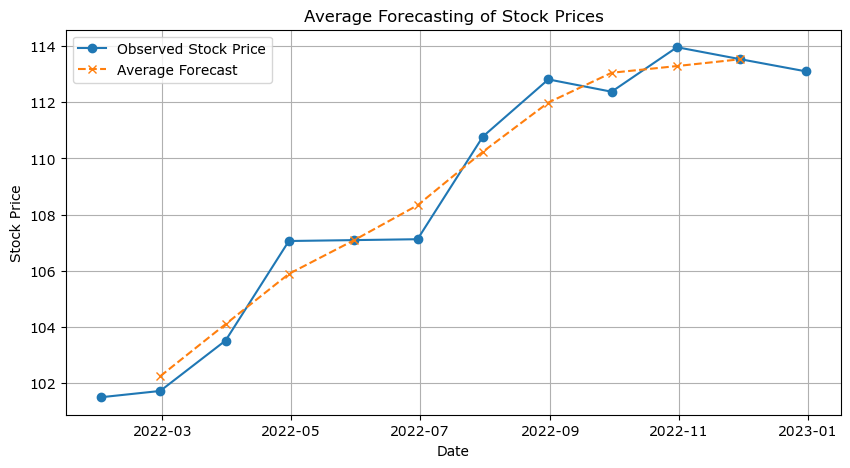

In [21]:
# Simulate stock prices over 12 months
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=12, freq='M')
stock_prices = 100 + np.cumsum(np.random.normal(loc=0.5, scale=2, size=12))  # Random walk for prices
df = pd.DataFrame({'Stock Price': stock_prices}, index=months)

# Compute the average of the last n observations
n = 3  # Number of periods to average over
df['Average Forecast'] = df['Stock Price'].rolling(window=n).mean().shift(-1)

# Plot the observed and forecasted stock prices
plt.figure(figsize=(10,5))
plt.plot(df['Stock Price'], label='Observed Stock Price', marker='o')
plt.plot(df['Average Forecast'], label='Average Forecast', linestyle='--', marker='x')
plt.title("Average Forecasting of Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

---
## Topic: Errors and Error Criterion

---



Forecasting errors are the differences between the **actual** values and the **predicted** values from a forecasting model. These errors provide insight into how well the model performs and help assess the accuracy of predictions.

$$
\text{Error}_t = Y_t - \hat{Y}_t
$$
Where:
- $ \text{Error}_t $ is the error at time $ t $,
- $ Y_t $ is the actual value at time $ t $,
- $ \hat{Y}_t $ is the forecasted value at time $ t $.


Several error criteria are used to evaluate the accuracy of forecasts. The most commonly used ones are:

- **Mean Absolute Error (MAE)**:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|
$$
- **Mean Squared Error (MSE)**:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$
- **Root Mean Squared Error (RMSE)**:
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}
$$
- **Mean Absolute Percentage Error (MAPE)**:
$$
\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left|\frac{Y_i - \hat{Y}_i}{Y_i}\right|
$$

### Use in Finance:
- **MSE** and **RMSE** are useful when penalizing large errors is critical (e.g., large deviations in financial data).
- **MAPE** is frequently used when it is important to express the error in terms of percentages.



In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Simulate stock prices over 12 months and forecast using a simple method (e.g., moving average)
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=12, freq='M')
stock_prices = 100 + np.cumsum(np.random.normal(loc=0.5, scale=2, size=12))  # Random walk for prices
df = pd.DataFrame({'Stock Price': stock_prices}, index=months)

# Simple forecast using the last observed value (naive forecast)
df['Naive Forecast'] = df['Stock Price'].shift(1)

# Drop the first row as it will have NaN values
df = df.dropna()

# Calculate error metrics
mae = mean_absolute_error(df['Stock Price'], df['Naive Forecast'])
mse = mean_squared_error(df['Stock Price'], df['Naive Forecast'])
rmse = sqrt(mse)

# Display the error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.29127148767799
Mean Squared Error (MSE): 3.3134789166058947
Root Mean Squared Error (RMSE): 1.8202963815285396


MAE: 45.00 (average error in original units)
MSE: 6850.00 (squared error, sensitive to large errors)
RMSE: 82.76 (error in original units, penalizes large errors)
MAPE: 11.39% (average percentage error)
MPE: -7.50% (bias in percentage, negative = over-forecasting)
SMAPE: 10.21% (symmetric percentage error, handles zeros)


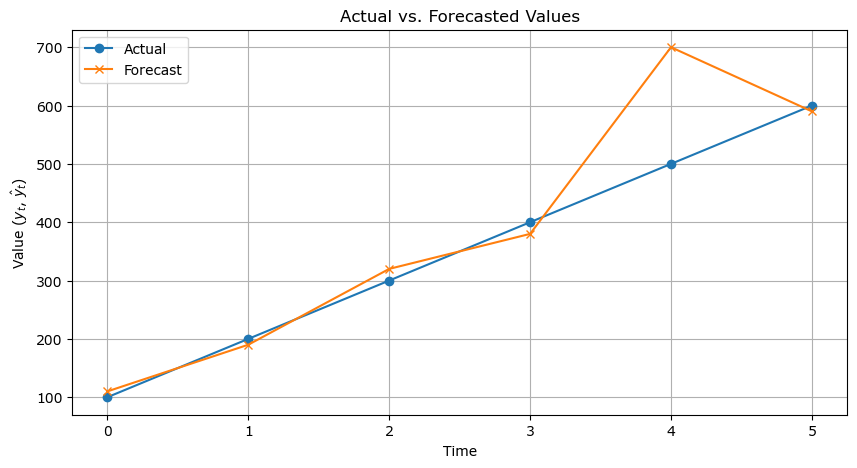

In [1]:
import numpy as np
import pandas as pd

# Sample data with a large error (500 vs. 700)
actual = np.array([100, 200, 300, 400, 500, 600])
forecast = np.array([110, 190, 320, 380, 700, 590])

# Calculate errors
errors = actual - forecast
abs_errors = np.abs(errors)
percentage_errors = errors / actual * 100
abs_percentage_errors = np.abs(percentage_errors)
smape_denominator = (np.abs(actual) + np.abs(forecast)) / 2

# Compute metrics
mae = np.mean(abs_errors)
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mape = np.mean(abs_percentage_errors)
mpe = np.mean(percentage_errors)
smape = 100 * np.mean(abs_errors / smape_denominator)

# Display results
print(f"MAE: {mae:.2f} (average error in original units)")
print(f"MSE: {mse:.2f} (squared error, sensitive to large errors)")
print(f"RMSE: {rmse:.2f} (error in original units, penalizes large errors)")
print(f"MAPE: {mape:.2f}% (average percentage error)")
print(f"MPE: {mpe:.2f}% (bias in percentage, negative = over-forecasting)")
print(f"SMAPE: {smape:.2f}% (symmetric percentage error, handles zeros)")

# Visualize actual vs. forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual', marker='o')
plt.plot(forecast, label='Forecast', marker='x')
plt.title('Actual vs. Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value ($y_t$, $\hat{y}_t$)')
plt.legend()
plt.grid(True)
plt.show()

MAE: “Average mistake, like being off by 45 units.”
	•  MSE: “Squares errors, so big mistakes like 80 units hurt a lot.”
	•  RMSE: “Like MAE but penalizes big errors, about 82.76 units.”
	•  MAPE: “Percentage error, 11.39% off on average.”
	•  MPE: “-7.50% means we’re forecasting too high.”
	•  SMAPE: “Like MAPE but better for tricky data, 10.21% error.”

##### Interpretation of Results
	•	MAE gives the average magnitude of the errors without considering their direction (positive/negative).
	•	MSE is more sensitive to large errors and gives greater penalty for them.
	•	RMSE provides a standard deviation-like measure of the forecast errors.
	•	MAPE expresses error as a percentage, which is useful for relative performance across different datasets.

---
## Topic: Naïve, Moving Average, and SES Forecasts

---



The **Naïve Forecasting** method is the simplest form of forecasting, where the forecast for the next period is equal to the actual value of the current period. This method assumes that the future value will be the same as the most recent observation.

**Formula:**  
$ \hat{Y}_{t+1} = Y_t $
Where:  
 - $ \hat{Y}_{t+1} $ is the forecast for time $ t+1 $,  
 - $ Y_t $ is the actual value at time $ t $.


- This method is often used as a **benchmark** for comparison with more sophisticated forecasting models.
- Useful when the data doesn’t exhibit a clear trend or seasonality.



The **Moving Average (MA)** method involves averaging a fixed number of past observations to predict future values. It’s a smoothing technique that can help reduce the impact of short-term fluctuations or noise.


$$
\hat{Y}_{t+1} = \frac{1}{n} \sum_{i=1}^{n} Y_{t-i+1}
$$
Where:
- $ \hat{Y}_{t+1} $ is the forecast for time $ t+1 $,
- $ Y_{t-i+1} $ are the actual values of the past $ n $ observations.




- Commonly used to smooth stock price data, identify long-term trends, and filter out short-term volatility.
- Widely used in technical analysis, especially in indicators like the **Simple Moving Average (SMA)**.


**Simple Exponential Smoothing (SES)** is a forecasting technique that gives more weight to recent observations while smoothing past data. It uses a weighted average where the weights decrease exponentially over time.


$$
\hat{Y}_{t+1} = \alpha Y_t + (1 - \alpha) \hat{Y}_t
$$
Where:
- $ \hat{Y}_{t+1} $ is the forecast for time $ t+1 $,
- $ Y_t $ is the actual value at time $ t $,
- $ \hat{Y}_t $ is the previous forecast,
- $ \alpha $ is the smoothing constant, $ 0 \leq \alpha \leq 1 $.


- **SES** is often used for forecasting when the data doesn’t exhibit trend or seasonality (i.e., it is a flat time series).
- It's commonly applied in short-term financial forecasting, such as predicting the next few stock prices or exchange rates.



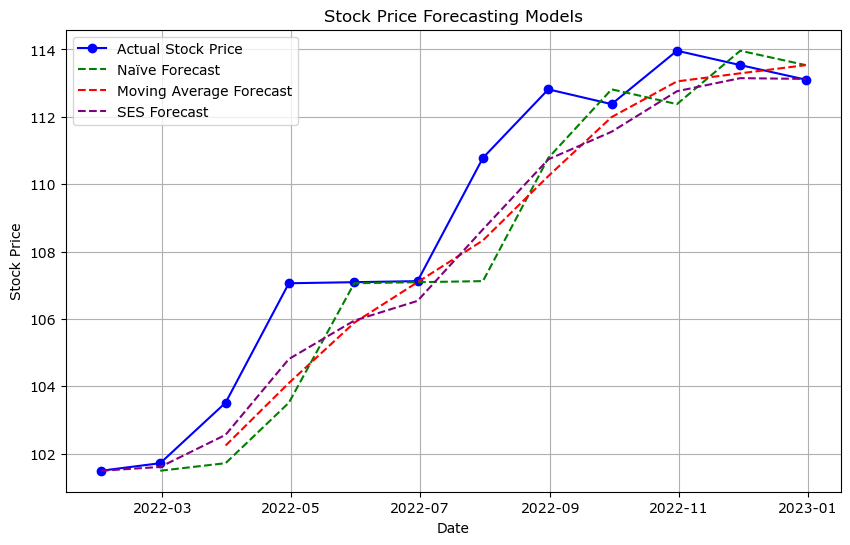

SES Model Errors: MAE=0.9729133383726717, MSE=1.5601823406691222, RMSE=1.2490725922335828
Naïve Model Errors: MAE=1.29127148767799, MSE=3.3134789166058947, RMSE=1.8202963815285396
Moving Average Model Errors: MAE=1.2464174205732932, MSE=2.5699578089592032, RMSE=1.6031087951100522


In [26]:

# Naïve Forecast Model
df['Naive Forecast'] = df['Stock Price'].shift(1)

# Moving Average Model (n=3)
n = 3
df['MA Forecast'] = df['Stock Price'].rolling(window=n).mean()

# Simple Exponential Smoothing (SES) Model
alpha = 0.5
df['SES Forecast'] = df['Stock Price'].ewm(alpha=alpha, adjust=False).mean()

# Plotting the forecasts
plt.figure(figsize=(10,6))
plt.plot(df['Stock Price'], label='Actual Stock Price', color='blue', marker='o')
plt.plot(df['Naive Forecast'], label='Naïve Forecast', linestyle='--', color='green')
plt.plot(df['MA Forecast'], label='Moving Average Forecast', linestyle='--', color='red')
plt.plot(df['SES Forecast'], label='SES Forecast', linestyle='--', color='purple')
plt.title("Stock Price Forecasting Models")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()a
plt.grid(True)
plt.show()

# Calculating Forecast Errors (MAE, MSE, RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# SES Forecast errors
ses_valid = df[['Stock Price', 'SES Forecast']].dropna()
mae_ses = mean_absolute_error(ses_valid['Stock Price'], ses_valid['SES Forecast'])
mse_ses = mean_squared_error(ses_valid['Stock Price'], ses_valid['SES Forecast'])
rmse_ses = math.sqrt(mse_ses)

# Naïve Forecast errors
naive_valid = df[['Stock Price', 'Naive Forecast']].dropna()
mae_naive = mean_absolute_error(naive_valid['Stock Price'], naive_valid['Naive Forecast'])
mse_naive = mean_squared_error(naive_valid['Stock Price'], naive_valid['Naive Forecast'])
rmse_naive = math.sqrt(mse_naive)

# Moving Average Forecast errors
ma_valid = df[['Stock Price', 'MA Forecast']].dropna()
mae_ma = mean_absolute_error(ma_valid['Stock Price'], ma_valid['MA Forecast'])
mse_ma = mean_squared_error(ma_valid['Stock Price'], ma_valid['MA Forecast'])
rmse_ma = math.sqrt(mse_ma)

# Display Errors
print(f"SES Model Errors: MAE={mae_ses}, MSE={mse_ses}, RMSE={rmse_ses}")
print(f"Naïve Model Errors: MAE={mae_naive}, MSE={mse_naive}, RMSE={rmse_naive}")
print(f"Moving Average Model Errors: MAE={mae_ma}, MSE={mse_ma}, RMSE={rmse_ma}")


3. Interpretation of Results

a. Naïve Model:
	•	The Naïve model is very simple, but it can be very accurate in short-term forecasting when there is little trend or seasonality.
	•	However, its accuracy will degrade in the presence of significant trend or seasonality.

b. Moving Average Model:
	•	The Moving Average model smooths the series, and the accuracy depends on the choice of window size ( n ).
	•	Larger windows will smooth out noise but may miss recent changes in the data.

c. SES Model:
	•	The Simple Exponential Smoothing model gives more weight to recent data, which makes it sensitive to recent trends.
	•	The accuracy of SES depends heavily on the smoothing parameter ( \alpha ).


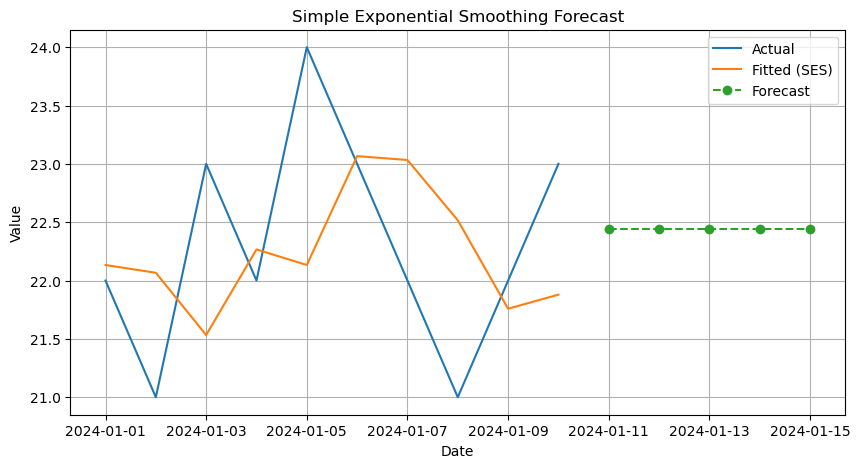

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample data: a small time series (no trend or seasonality)
data = [22, 21, 23, 22, 24, 23, 22, 21, 22, 23]
index = pd.date_range(start='2024-01-01', periods=len(data), freq='D')
series = pd.Series(data, index=index)

# Fit SES model (no trend, no seasonality)
model = ExponentialSmoothing(series, trend=None, seasonal=None)
fit = model.fit(smoothing_level=0.5, optimized=False)  # alpha = 0.5

# Forecast next 5 days
forecast = fit.forecast(steps=5)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual')
plt.plot(fit.fittedvalues, label='Fitted (SES)')
plt.plot(forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



### **Mathematics Behind Simple Exponential Smoothing (SES)**


### **1. Forecasting Equation**

SES uses the following recursive formula:

$$
\hat{Y}_t = \alpha Y_{t-1} + (1 - \alpha)\hat{Y}_{t-1}
$$

Where:

* \$\hat{Y}\_t\$: Forecast at time \$t\$
* \$Y\_{t-1}\$: Actual value at time \$t-1\$
* \$\hat{Y}\_{t-1}\$: Forecast at time \$t-1\$
* \$\alpha\$: Smoothing parameter, \$0 < \alpha < 1\$

---

### **2. Mathematical Intuition**

At each step:

* The forecast is a weighted average of the latest observation and the previous forecast.
* **Higher** \$\alpha\$: more weight on \$Y\_{t-1}\$ (recent observation)
* **Lower** \$\alpha\$: more weight on \$\hat{Y}\_{t-1}\$ (historical trend)

---

### **3. Recursive Expansion**

Expanding the formula recursively:

$$
\hat{Y}_t = \alpha Y_{t-1} + \alpha(1 - \alpha)Y_{t-2} + \alpha(1 - \alpha)^2 Y_{t-3} + \dots
$$

This reveals:

* SES is a **weighted average** of all past observations
* Weights **decay exponentially** for older data

Hence the name: *Exponential* Smoothing

---

### **4. Initialization**

To start the recursion at \$t = 1\$:

$$
\hat{Y}_1 = Y_1
$$

Alternatively, an average of the first few observations can be used.

---

### **5. Forecasting Future Values**

For \$h\$-step ahead forecasts (\$h > 0\$):

$$
\hat{Y}_{t+h} = \hat{Y}_t
$$

Since SES assumes no trend or seasonality, all future forecasts are constant — equal to the last forecast.

---

### **Summary**

SES creates a smooth version of the time series where:

* Recent data has **greater influence**
* Forecasts **adapt gradually** unless \$\alpha\$ is high

It’s simple, robust, and effective for stationary series with no trend or seasonality.


---
## Topic: Diagnostic Tools for Forecast Evaluation

---

Evaluating forecasting models is crucial for determining how well a model performs and whether it can be used for decision-making. **Diagnostic tools** help assess the accuracy, reliability, and validity of the forecasted data.


### a. **Residual Analysis**

Residuals are the differences between the observed values and the forecasted values. A good forecasting model should have residuals that resemble white noise, i.e., they should have no autocorrelation and should be normally distributed.

$$
\text{Residual}_t = Y_t - \hat{Y}_t
$$
Where:
- $ Y_t $ is the observed value at time $ t $,
- $ \hat{Y}_t $ is the forecasted value at time $ t $.

**Steps to Perform Residual Analysis:**
1. Calculate the residuals.
2. Plot the residuals (or use statistical tests like the Ljung-Box test) to check for autocorrelation.
3. Analyze the distribution of residuals using histograms or Q-Q plots to ensure normality.





### b. **Autocorrelation Function (ACF)**

The **Autocorrelation Function (ACF)** measures the correlation between the time series data and its lagged values. It is used to check if the residuals of the forecast model are autocorrelated.

$$
\text{ACF}(h) = \frac{\sum_{t=1}^{n-h} (Y_t - \bar{Y})(Y_{t+h} - \bar{Y})}{\sum_{t=1}^{n} (Y_t - \bar{Y})^2}
$$
Where:
- $ h $ is the lag,
- $ Y_t $ is the observed value at time $ t $,
- $ \bar{Y} $ is the mean of the observed values.

Scenario:

Suppose you have a time series of residuals from a forecasting model:

Y = [3, 2, 4, 5, 6]

Step 1: Compute the Mean

$$
\bar{Y} = \frac{3 + 2 + 4 + 5 + 6}{5} = \frac{20}{5} = 4
$$

Step 2: Compute ACF at Lag $h = 1$

$$
\text{ACF}(1) = \frac{\sum_{t=1}^{n-1} (Y_t - \bar{Y})(Y_{t+1} - \bar{Y})}{\sum_{t=1}^{n} (Y_t - \bar{Y})^2}
$$

Numerator:

$$
(3 - 4)(2 - 4) + (2 - 4)(4 - 4) + (4 - 4)(5 - 4) + (5 - 4)(6 - 4) \
= (-1)(-2) + (-2)(0) + (0)(1) + (1)(2) = 2 + 0 + 0 + 2 = 4
$$

Denominator:

$$
(3 - 4)^2 + (2 - 4)^2 + (4 - 4)^2 + (5 - 4)^2 + (6 - 4)^2 \
= 1 + 4 + 0 + 1 + 4 = 10
$$

ACF:

$$
\text{ACF}(1) = \frac{4}{10} = 0.4
$$

Interpretation:

There is a moderate positive autocorrelation at lag 1. If this were residuals, it would suggest the model is missing a pattern.




### c. **Ljung-Box Test**

The **Ljung-Box test** is used to check whether there is significant autocorrelation in the residuals. If the p-value is high, we fail to reject the null hypothesis, indicating no significant autocorrelation.

$$
Q = n(n+2) \sum_{h=1}^{m} \frac{\hat{\rho}_h^2}{n-h}
$$
Where:
- $ \hat{\rho}_h $ is the sample autocorrelation at lag $ h $,
- $ n $ is the number of observations,
- $ m $ is the number of lags to test.

Assume you have these autocorrelations of residuals at lags $h = 1, 2, 3$:

$$
\hat{\rho}_1 = 0.4,\quad \hat{\rho}_2 = 0.2,\quad \hat{\rho}_3 = 0.1
$$

And $n = 20$, $m = 3$.

Formula:

$$
Q = n(n+2) \sum_{h=1}^{m} \frac{\hat{\rho}_h^2}{n - h}
$$

Plug in the values:

$$
Q = 20(22) \left( \frac{0.4^2}{19} + \frac{0.2^2}{18} + \frac{0.1^2}{17} \right)
$$

$$
Q = 440 \left( \frac{0.16}{19} + \frac{0.04}{18} + \frac{0.01}{17} \right)
$$

$$
Q = 440 \left( 0.00842 + 0.00222 + 0.00059 \right) = 440 \times 0.01123 \approx 4.94
$$

Interpretation:

Compare $Q = 4.94$ to the chi-squared critical value at 3 degrees of freedom:

$$
\chi^2_{0.05, df=3} = 7.815
$$

Since $4.94 < 7.815$, we fail to reject the null hypothesis:

→ Residuals are likely not autocorrelated.



### d. **Normality Test of Residuals (Shapiro-Wilk)**

A normality test, such as the **Shapiro-Wilk** test, assesses if the model's residuals follow a normal distribution, a key assumption for the validity of many statistical inferences. Normally distributed residuals suggest the model is appropriate.

**Example using the Shapiro-Wilk test:**

Assume the residuals from a forecasting model are:

```
e = [1.2, -0.4, 0.5, -1.1, 0.3, 0.9, -0.8, -0.6]
```

We can use the `scipy.stats` library in Python to perform the Shapiro-Wilk test:

```python
from scipy.stats import shapiro

residuals = [1.2, -0.4, 0.5, -1.1, 0.3, 0.9, -0.8, -0.6]
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p_value}")
```

**Output:**
$$\text{Test statistic} = 0.97,\quad p\text{-value} = 0.85$$

**Interpretation:**

Since the $p$-value (0.85) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This indicates that the residuals are likely normally distributed, supporting the model's assumptions.

**Understanding Normality:**

A variable is normally distributed if its values form a bell-shaped curve (Gaussian distribution), characterized by:

  * Most values clustering around the mean.
  * Symmetrical distribution with fewer values further from the mean.
  * Consistent spread, quantified by the standard deviation.

The probability density function (PDF) of the normal distribution is given by:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x - \mu)^2}{2\sigma^2} }$$

where $\\mu$ is the mean and $\\sigma^2$ is the variance.

**Importance of Normal Residuals in Forecasting:**

In forecasting, we often assume that the errors (residuals) behave as random noise with specific properties, including normality. This assumption is crucial because:

1.  **Statistical Inference:** Many statistical tests and the construction of confidence intervals rely on the assumption of normality. Non-normal residuals can lead to unreliable conclusions.
2.  **Model Appropriateness:** Normally distributed residuals suggest that the model has effectively captured the underlying patterns in the data. Deviations from normality might indicate issues like:
      * **Missing Nonlinearity:** The model might not be accounting for non-linear relationships.
      * **Outliers:** Extreme values can distort the distribution of residuals.
      * **Model Misspecification:** The chosen model structure might not be appropriate for the data.

**The Shapiro-Wilk Test in Detail:**

The Shapiro-Wilk test specifically assesses whether a given data sample is likely drawn from a normally distributed population.

  * **Null Hypothesis ($H\_0$):** The data follows a normal distribution.
  * **Alternative Hypothesis ($H\_1$):** The data does not follow a normal distribution.

The test calculates a statistic ($W$) that measures the similarity between the ordered sample values and the expected values under a normal distribution. A small $p$-value (typically \< 0.05) leads to the rejection of the null hypothesis, suggesting that the data is not normally distributed.

**Further Interpretation Example:**

Consider the following Shapiro-Wilk test result:

```python
from scipy.stats import shapiro
residuals = [1.1, -0.9, 0.3, -1.2, 0.5]
stat, p = shapiro(residuals)
print(p)
```

**Output:**

```
0.78
```

  * Since the $p$-value (0.78) is greater than 0.05, we fail to reject the null hypothesis.
  * Therefore, we can conclude that these residuals are likely normally distributed, indicating that the model performs adequately with respect to this assumption.

/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_1900/2612017982.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2022-01-01', periods=12, freq='M')


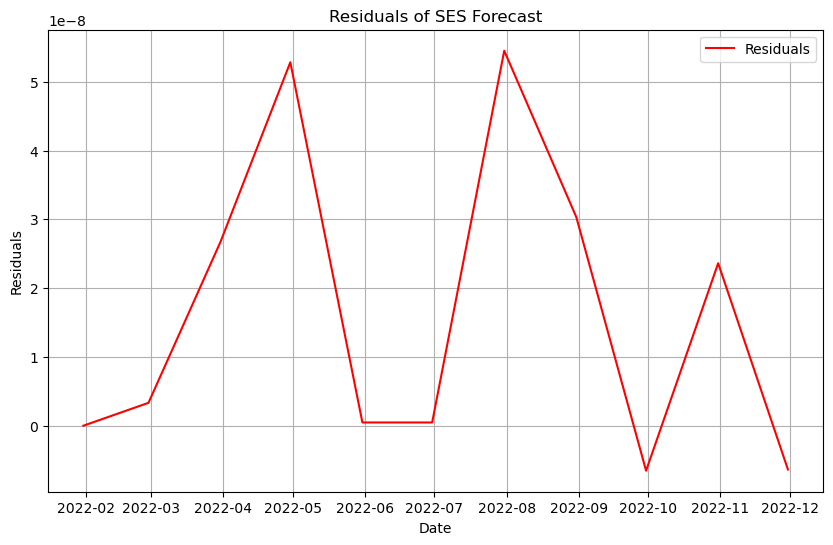

<Figure size 1000x600 with 0 Axes>

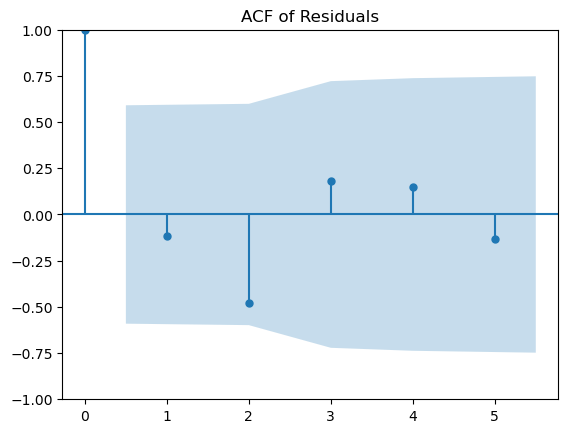

Ljung-Box test results:
   lb_stat  lb_pvalue
1     0.19       0.66
2     3.88       0.14
3     4.48       0.21
4     4.92       0.30
5     5.35       0.38
Shapiro-Wilk test statistic: 0.8512478657520903, p-value: 0.04430714212710189


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Simulate stock prices over 12 months and perform forecast using SES model
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=12, freq='M')
stock_prices = 100 + np.cumsum(np.random.normal(loc=0.5, scale=2, size=12))  # Random walk for prices
df = pd.DataFrame({'Stock Price': stock_prices}, index=months)

# Simple Exponential Smoothing Forecast (using alpha = 0.5)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(df['Stock Price'], trend=None, seasonal=None)
df['SES Forecast'] = model.fit().fittedvalues.shift(-1)

# Calculate residuals
df['Residuals'] = df['Stock Price'] - df['SES Forecast']

# Plot residuals
plt.figure(figsize=(10,6))
plt.plot(df['Residuals'], label='Residuals', color='red')
plt.title("Residuals of SES Forecast")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()

# ACF plot for residuals
plt.figure(figsize=(10,6))
plot_acf(df['Residuals'].dropna(), lags=5)
plt.title("ACF of Residuals")
plt.show()

# Ljung-Box test for autocorrelation in residuals
ljung_box_result = acorr_ljungbox(df['Residuals'].dropna(), lags=5)
print("Ljung-Box test results:")
print(ljung_box_result)

# Shapiro-Wilk test for normality of residuals
stat, p_value = shapiro(df['Residuals'].dropna())
print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p_value}")

##### Interpretation of Results
	•	Residual Plot: The residuals should be randomly scattered around zero, with no discernible pattern. Any pattern in the residuals indicates that the model has not fully captured some aspect of the data.
	•	ACF Plot: If the residuals are autocorrelated, we expect spikes in the ACF plot at certain lags. A white noise residual should have no significant autocorrelations.
	•	Ljung-Box Test: A high p-value indicates that the residuals are uncorrelated, meaning that there is no significant autocorrelation in the model residuals.
	•	Shapiro-Wilk Test: A p-value above 0.05 indicates that the residuals are normally distributed.


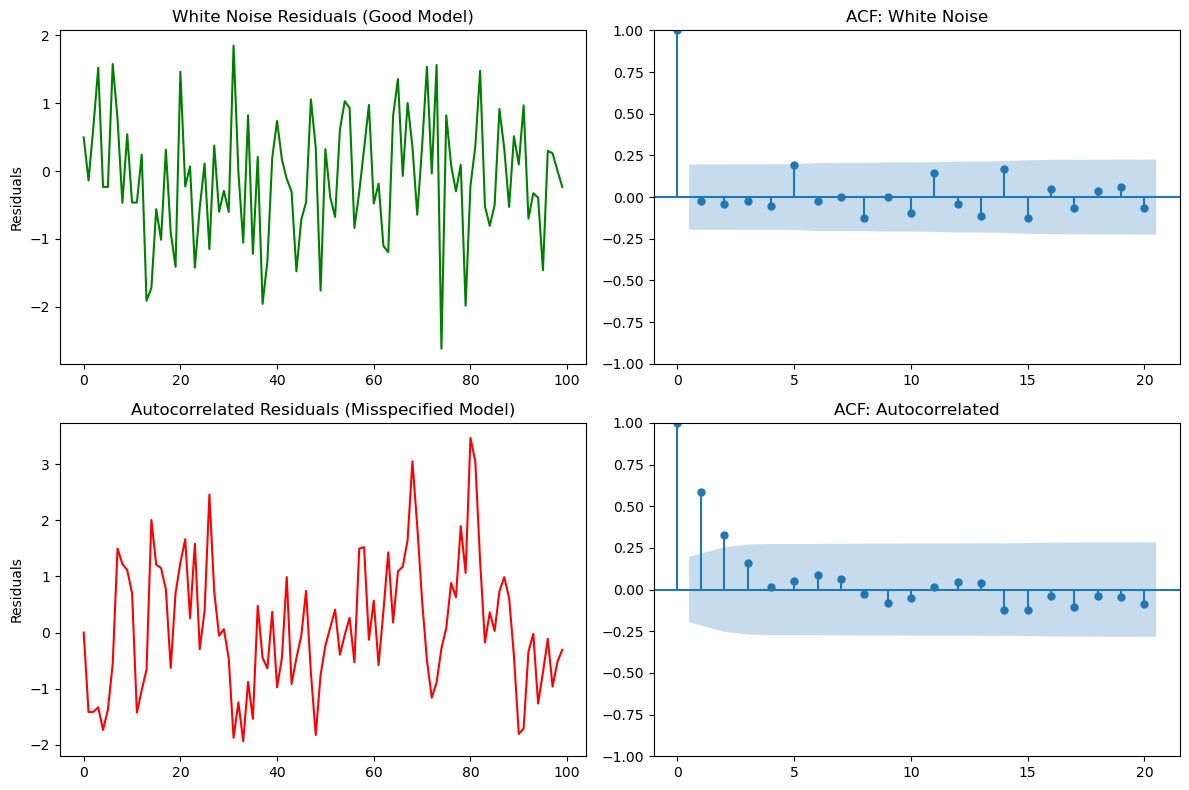

Ljung-Box Test (White Noise Residuals):
    lb_stat  lb_pvalue
10     7.47       0.68

Ljung-Box Test (Autocorrelated Residuals):
    lb_stat  lb_pvalue
10    51.50       0.00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Set seed for reproducibility
np.random.seed(42)
n = 100

# Generate white noise residuals (ideal model)
residuals_white_noise = np.random.normal(0, 1, n)

# Generate autocorrelated residuals (bad model)
residuals_autocorrelated = np.zeros(n)
for t in range(1, n):
    residuals_autocorrelated[t] = 0.7 * residuals_autocorrelated[t-1] + np.random.normal(0, 1)

# Plot residual time series and ACFs
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Time series
axs[0, 0].plot(residuals_white_noise, color='green')
axs[0, 0].set_title("White Noise Residuals (Good Model)")
axs[0, 0].set_ylabel("Residuals")

axs[1, 0].plot(residuals_autocorrelated, color='red')
axs[1, 0].set_title("Autocorrelated Residuals (Misspecified Model)")
axs[1, 0].set_ylabel("Residuals")

# ACFs
plot_acf(residuals_white_noise, ax=axs[0, 1], lags=20, title="ACF: White Noise")
plot_acf(residuals_autocorrelated, ax=axs[1, 1], lags=20, title="ACF: Autocorrelated")

plt.tight_layout()
plt.show()

# Ljung-Box Test Results
print("Ljung-Box Test (White Noise Residuals):")
print(acorr_ljungbox(residuals_white_noise, lags=[10], return_df=True))

print("\nLjung-Box Test (Autocorrelated Residuals):")
print(acorr_ljungbox(residuals_autocorrelated, lags=[10], return_df=True))

What is a p-value?

In statistics, the p-value is the probability of observing test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is true.


In the Context of the Ljung-Box Test:
	•	Null Hypothesis (H₀): Residuals are white noise (no autocorrelation).
	•	Alternative Hypothesis (H₁): Residuals are not white noise (they are autocorrelated).


Example 1:

Ljung-Box Test (White Noise Residuals):
lb_stat = 7.468256
lb_pvalue = 0.680622

	•	p-value = 0.680622
	•	Interpretation: There’s a 68% chance you’d see this test statistic (or more extreme) if residuals really were white noise.
	•	Conclusion: That’s very likely — so we don’t reject the null hypothesis.
The residuals are probably just noise.


Example 2:

Ljung-Box Test (Autocorrelated Residuals):
lb_stat = 51.501766
lb_pvalue = 0.000000141

	•	p-value = 0.000000141 (or 1.41e-07)
	•	Interpretation: There’s a 0.0000141% chance you’d get this test statistic (or more extreme) if residuals were truly white noise.
	•	Conclusion: That’s highly unlikely — so we reject the null hypothesis.
The residuals are not random; they show autocorrelation.


Use the 5% significance level (p < 0.05) as a cutoff:
	•	p > 0.05 → Residuals are okay → Model is fine
	•	p < 0.05 → Residuals are autocorrelated → Model is inadequate


### Homoscedasticity and Heteroscedasticity

**Definition:** Homoscedasticity refers to a condition where the variance of the errors (residuals) in a model is constant across all levels of the predicted values.

**Mathematical Representation:** If the error term at time $t$ is defined as:

$$e_t = Y_t - \hat Y_t$$

where $Y_t$ is the actual value and $\hat Y_t$ is the predicted value, then homoscedasticity implies:

$$\mathrm{Var}(e_t) = \sigma^2 \quad \text{for all }t.$$

This means the spread of the residuals remains the same regardless of the magnitude of the forecast.

**Importance of Homoscedasticity:**

The assumption of homoscedasticity is crucial for several reasons:

1.  **Reliable Confidence Intervals:** Many forecasting and regression techniques rely on the assumption of constant error variance to calculate the width of prediction intervals. If the error variance changes (heteroscedasticity), the prediction intervals will be:
    * Too narrow in regions where the error variance is high, leading to overconfidence.
    * Too wide in regions where the error variance is low, leading to underconfidence.

2.  **Valid Hypothesis Tests:** Statistical tests for significance, such as t-tests on coefficients and F-tests for model fit, assume constant error variance. Heteroscedasticity can lead to:
    * Incorrect p-values, potentially causing you to incorrectly identify variables as significant or insignificant.

3.  **Efficiency of Estimates:** Under homoscedasticity, Ordinary Least Squares (OLS) and similar estimators are considered the Best Linear Unbiased Estimators (BLUE), meaning they provide the most efficient (lowest variance) unbiased estimates. In the presence of heteroscedasticity:
    * OLS remains unbiased but is no longer the most efficient estimator. Other estimation methods could yield more precise results.

**Illustrative Example:**

Consider forecasting daily sales for two stores:

* **Store A:** Consistently sells around 100 units with a variation of $\pm 10$ units.
* **Store B:** Sales fluctuate more widely, selling around 100 units with a variation of $\pm 50$ units.

If a single forecasting model is applied to both stores, the residuals for Store B will exhibit a much larger spread than those for Store A. This violates the assumption of homoscedasticity ("same scatter everywhere"). Consequently, the prediction intervals generated by the model might be:

* Too tight for Store B, underestimating the actual uncertainty in sales.
* Too loose for Store A, overestimating the uncertainty.

**Consequences of Ignoring Heteroscedasticity:**

Ignoring heteroscedasticity can lead to several problems:

* **Misleading Confidence Intervals:** Forecast uncertainty will be inaccurately represented, either overstated or understated.
* **Wrong Significance Tests:** Conclusions about the significance of trends or effects might be incorrect due to unreliable p-values.
* **Poor Resource Allocation:** Decisions based on flawed intervals and tests (e.g., staffing levels, inventory management) will likely be suboptimal.

**Methods to Check for Homoscedasticity:**

Several methods can be used to detect heteroscedasticity:

1.  **Residuals vs. Fitted Plot:**
    * Plot the residuals ($e_t$) on the vertical (y) axis against the fitted values ($\hat Y_t$) on the horizontal (x) axis.
    * Examine the scatter of the points. Under homoscedasticity, the points should form a **random cloud with a roughly constant vertical spread** across all fitted values.
    * A **fan shape** (where the vertical spread of the residuals increases or decreases as the fitted values change) is a visual indicator of **heteroscedasticity**.

2.  **Breusch–Pagan Test:**
    * This is a formal statistical test designed to detect whether the variance of the errors is dependent on the values of the independent variables (or the fitted values).
    * **Null Hypothesis:** The variance of the errors is constant (homoscedasticity).
    * A **low p-value** (typically below a chosen significance level, e.g., 0.05) leads to the rejection of the null hypothesis, providing statistical evidence of **heteroscedasticity**.

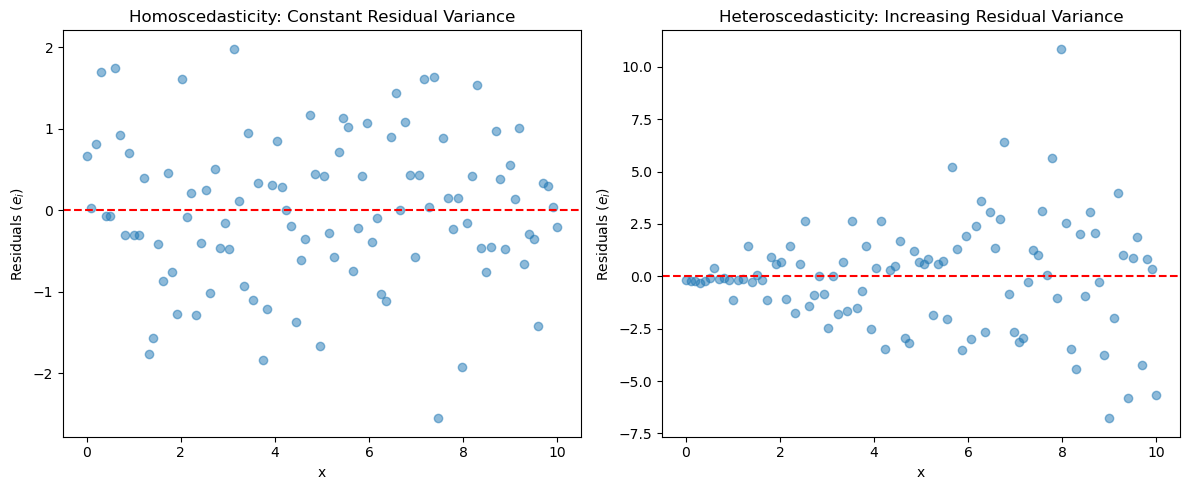

Breusch-Pagan Test for Homoscedastic Data:
LM Statistic: 0.27, p-value: 0.6014

Breusch-Pagan Test for Heteroscedastic Data:
LM Statistic: 13.07, p-value: 0.0003


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n = 100
x = np.linspace(0, 10, n)

# Homoscedastic data: constant variance
y_homo = 2 * x + np.random.normal(0, 1, n)

# Heteroscedastic data: variance increases with x
y_hetero = 2 * x + np.random.normal(0, x * 0.5, n)

# Fit linear regression models
X = sm.add_constant(x)  # Add intercept
model_homo = sm.OLS(y_homo, X).fit()
model_hetero = sm.OLS(y_hetero, X).fit()

# Residuals
res_homo = model_homo.resid
res_hetero = model_hetero.resid

# Plotting
plt.figure(figsize=(12, 5))

# Homoscedastic plot
plt.subplot(1, 2, 1)
plt.scatter(x, res_homo, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticity: Constant Residual Variance')
plt.xlabel('x')
plt.ylabel('Residuals ($e_i$)')

# Heteroscedastic plot
plt.subplot(1, 2, 2)
plt.scatter(x, res_hetero, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Heteroscedasticity: Increasing Residual Variance')
plt.xlabel('x')
plt.ylabel('Residuals ($e_i$)')

plt.tight_layout()
plt.show()

# Breusch-Pagan test for heteroscedasticity
bp_test_homo = het_breuschpagan(res_homo, X)
bp_test_hetero = het_breuschpagan(res_hetero, X)

print("Breusch-Pagan Test for Homoscedastic Data:")
print(f"LM Statistic: {bp_test_homo[0]:.2f}, p-value: {bp_test_homo[1]:.4f}")
print("\nBreusch-Pagan Test for Heteroscedastic Data:")
print(f"LM Statistic: {bp_test_hetero[0]:.2f}, p-value: {bp_test_hetero[1]:.4f}")


Stall A is located in a stable residential area with consistent foot traffic. Its daily sales tend to fluctuate within a narrow range.

Stall B is located near a seasonal tourist attraction. Its daily sales are much more volatile, depending on the time of the week and the tourist season.

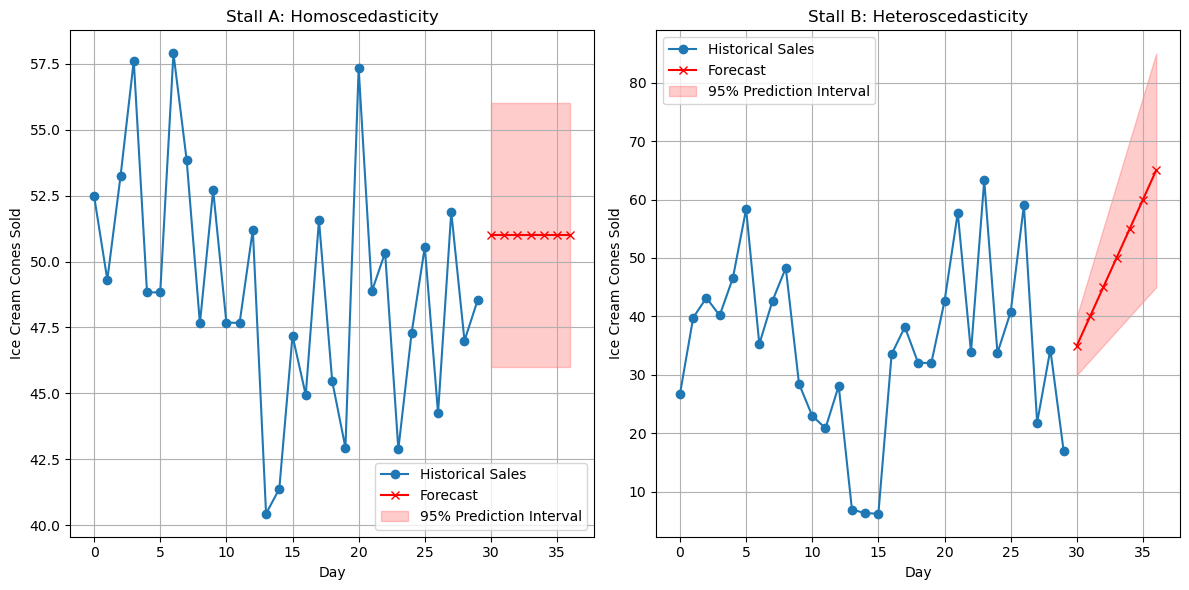

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# --- Stall A: Homoscedasticity ---
np.random.seed(42)
time_a = np.arange(30)
historical_sales_a = 50 + np.random.normal(0, 5, 30)
forecast_days = np.arange(30, 37)
forecast_a = np.full(7, 51)
upper_bound_a = forecast_a + 5
lower_bound_a = forecast_a - 5

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(time_a, historical_sales_a, label='Historical Sales', marker='o')
plt.plot(forecast_days, forecast_a, label='Forecast', marker='x', color='red')
plt.fill_between(forecast_days, lower_bound_a, upper_bound_a, color='red', alpha=0.2, label='95% Prediction Interval')
plt.title('Stall A: Homoscedasticity')
plt.xlabel('Day')
plt.ylabel('Ice Cream Cones Sold')
plt.legend()
plt.grid(True)

# --- Stall B: Heteroscedasticity ---
np.random.seed(123)
time_b = np.arange(30)
base_sales_b = 30 + 20 * np.sin(np.linspace(0, 3 * np.pi, 30)) # Simulate some trend
noise_b = np.random.normal(0, np.linspace(3, 15, 30), 30) # Increasing variance over time
historical_sales_b = base_sales_b + noise_b
forecast_b_point = np.linspace(35, 65, 7)
upper_bound_b = forecast_b_point + np.linspace(5, 20, 7)
lower_bound_b = forecast_b_point - np.linspace(5, 20, 7)

plt.subplot(1, 2, 2)
plt.plot(time_b, historical_sales_b, label='Historical Sales', marker='o')
plt.plot(forecast_days, forecast_b_point, label='Forecast', marker='x', color='red')
plt.fill_between(forecast_days, lower_bound_b, upper_bound_b, color='red', alpha=0.2, label='95% Prediction Interval')
plt.title('Stall B: Heteroscedasticity')
plt.xlabel('Day')
plt.ylabel('Ice Cream Cones Sold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### **Impact of Heteroscedasticity on Forecasting with Simple Exponential Smoothing (SES)**

#### **Recap of Scenarios**

1. **Homoscedastic Data**

   * Constant residual variance across predictor (\$x\$)
   * Example: \$y = 2x + \epsilon\$, where \$\epsilon \sim N(0, 1)\$
   * Visual: Residuals are evenly scattered with constant spread

2. **Heteroscedastic Data**

   * Residual variance changes with \$x\$
   * Example: \$y = 2x + \epsilon\$, where \$\epsilon \sim N(0, 0.5x)\$
   * Visual: Residuals form a funnel shape; spread increases with \$x\$


### **Simple Exponential Smoothing (SES)**

SES forecasts future values using exponentially weighted past data:

$\hat{y}_{t+1} = \alpha y_t + (1 - \alpha)\hat{y}_t$

Where:

* \$\hat{y}\_{t+1}\$: forecast for next time step
* \$y\_t\$: actual value at time \$t\$
* \$\hat{y}\_t\$: forecast at time \$t\$
* \$\alpha\$: smoothing parameter, \$0 < \alpha < 1\$

**Assumptions:**

* No trend or seasonality
* Errors are i.i.d. with constant variance (homoscedastic)

### **Effect of Error Variance on SES**

#### **1. Homoscedastic Time Series**

* Error: \$\epsilon\_t \sim N(0, \sigma^2)\$ (constant over time)

**Impact:**

* SES aligns well with assumptions
* Forecasts and intervals are stable and reliable
* \$\alpha\$ effectively balances recency and history

**Example:** Daily bread sales with random noise of about \$\pm 100\$


#### **2. Heteroscedastic Time Series**

* Error: \$\epsilon\_t \sim N(0, \sigma\_t^2)\$, where \$\sigma\_t^2\$ grows with \$t\$ or \$y\_t\$

**Impact:**

* **Forecast Bias:** SES misinterprets fluctuations
* **Unreliable Intervals:** Too narrow during high variance, too wide during low
* **Poor Volatility Handling:** May lag or overreact with large \$\alpha\$

**Example:** Tech gadget sales

* Launch: noise \$\approx \pm 1000\$
* Off-peak: noise \$\approx \pm 50\$


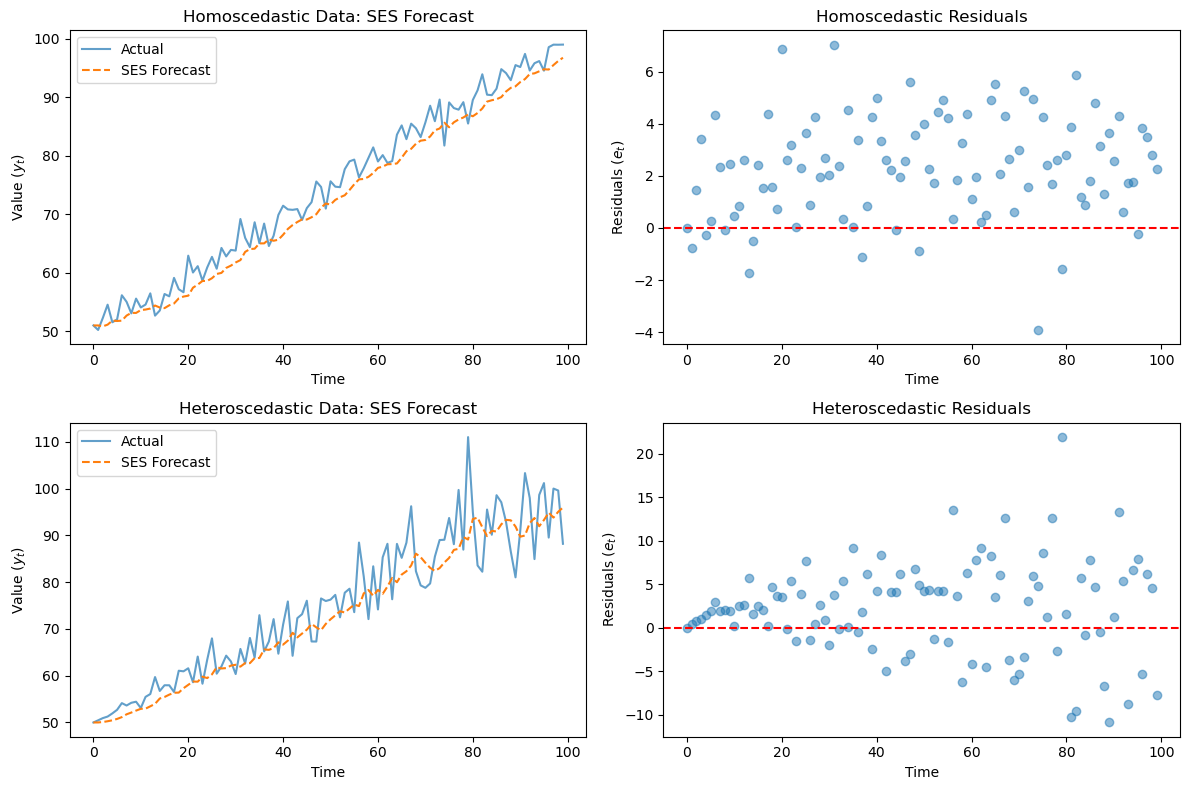

MAE for Homoscedastic Data: 2.54
MAE for Heteroscedastic Data: 4.60


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Set random seed for reproducibility
np.random.seed(42)

# Generate time-series data
n = 100
t = np.arange(n)

# Homoscedastic data: constant variance
y_homo = 50 + 0.5 * t + np.random.normal(0, 2, n)

# Heteroscedastic data: variance increases with time
y_hetero = 50 + 0.5 * t + np.random.normal(0, 0.1 * t, n)

# Apply SES
alpha = 0.2
model_homo = SimpleExpSmoothing(y_homo).fit(smoothing_level=alpha, optimized=False)
model_hetero = SimpleExpSmoothing(y_hetero).fit(smoothing_level=alpha, optimized=False)

# Forecasts (one-step ahead)
forecast_homo = model_homo.fittedvalues
forecast_hetero = model_hetero.fittedvalues

# Residuals
res_homo = y_homo - forecast_homo
res_hetero = y_hetero - forecast_hetero

# Plotting
plt.figure(figsize=(12, 8))

# Homoscedastic: Series and Forecast
plt.subplot(2, 2, 1)
plt.plot(t, y_homo, label='Actual', alpha=0.7)
plt.plot(t, forecast_homo, label='SES Forecast', linestyle='--')
plt.title('Homoscedastic Data: SES Forecast')
plt.xlabel('Time')
plt.ylabel('Value ($y_t$)')
plt.legend()

# Homoscedastic: Residuals
plt.subplot(2, 2, 2)
plt.scatter(t, res_homo, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedastic Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals ($e_t$)')

# Heteroscedastic: Series and Forecast
plt.subplot(2, 2, 3)
plt.plot(t, y_hetero, label='Actual', alpha=0.7)
plt.plot(t, forecast_hetero, label='SES Forecast', linestyle='--')
plt.title('Heteroscedastic Data: SES Forecast')
plt.xlabel('Time')
plt.ylabel('Value ($y_t$)')
plt.legend()

# Heteroscedastic: Residuals
plt.subplot(2, 2, 4)
plt.scatter(t, res_hetero, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Heteroscedastic Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals ($e_t$)')

plt.tight_layout()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_homo = np.mean(np.abs(res_homo))
mae_hetero = np.mean(np.abs(res_hetero))
print(f"MAE for Homoscedastic Data: {mae_homo:.2f}")
print(f"MAE for Heteroscedastic Data: {mae_hetero:.2f}")

### **Exponential Smoothing Models in `statsmodels`**

The `statsmodels` library supports three main types of exponential smoothing models:

---

#### **1. Simple Exponential Smoothing (SES)**

* No trend
* No seasonality
* Suitable for stationary data (no upward/downward pattern)

**Forecast equation:**
$\hat{y}_{t+1} = \alpha y_t + (1 - \alpha)\hat{y}_t$
Where:

* \$0 < \alpha < 1\$ is the smoothing parameter

---

#### **2. Holt’s Linear Trend Method**

* Captures linear trend
* No seasonality
* Also known as **Double Exponential Smoothing**

**Equations:**

* Level: \$l\_t = \alpha y\_t + (1 - \alpha)(l\_{t-1} + b\_{t-1})\$
* Trend: \$b\_t = \beta (l\_t - l\_{t-1}) + (1 - \beta) b\_{t-1}\$
* Forecast: \$\hat{y}\_{t+h} = l\_t + h b\_t\$

Where:

* \$\alpha\$ is the level smoothing parameter
* \$\beta\$ is the trend smoothing parameter
* \$h\$ is the forecast horizon

---

#### **3. Holt-Winters Seasonal Method**

* Captures trend and seasonality
* Also called **Triple Exponential Smoothing**
* Seasonality can be **additive** or **multiplicative**

**Additive Seasonal Model:**

* Level: \$l\_t = \alpha (y\_t - s\_{t-m}) + (1 - \alpha)(l\_{t-1} + b\_{t-1})\$
* Trend: \$b\_t = \beta (l\_t - l\_{t-1}) + (1 - \beta) b\_{t-1}\$
* Seasonality: \$s\_t = \gamma (y\_t - l\_{t-1} - b\_{t-1}) + (1 - \gamma)s\_{t-m}\$
* Forecast: \$\hat{y}*{t+h} = l\_t + h b\_t + s*{t+h-m(k)}\$

**Multiplicative Seasonal Model:**

* Replace additive components (e.g., \$y\_t - s\_{t-m}\$) with multiplicative ones (e.g., \$y\_t / s\_{t-m}\$)

Where:

* \$m\$ is the seasonal period
* \$\gamma\$ is the seasonality smoothing parameter
* \$k = \lfloor (h-1)/m \rfloor\$

---
